In [1]:
from fastai.tabular import * 

In [2]:
dPath = Path("../docs/dumps")

In [3]:
with open(dPath / "train_data.pkl", 'rb') as filename:
    train_data = pickle.load(filename)

In [4]:
with open(dPath / "valid_data.pkl", 'rb') as filename:
    valid_data = pickle.load(filename)

In [5]:
with open(dPath / "not_running.pkl", 'rb') as filename:
    not_running = pickle.load(filename)

In [6]:
with open(dPath / "rf_exp_05_names.pkl", 'rb') as filename:
    names = pickle.load(filename)

In [7]:
len(valid_data)

67496

In [8]:
all_df = pd.concat([train_data, not_running, valid_data],axis=0,ignore_index=True)

In [9]:
all_df['MutatorClass'] = all_df.MutatorClass.astype('category')

In [10]:
all_df['returnType'] = all_df.returnType.astype('category')

In [11]:
all_df.head().T.head(40)

,0,1,2,3,4
Detected,True,True,True,True,True
MutatorClass,2,6,6,0,0
returnType,3,3,3,3,3
numExecuted,14,14,14,14,14
numTestCover,1,1,1,1,1
numAssertInTM,7,7,7,7,7
numAssertInTC,14,14,14,14,14
ppnumberOfClasses,5,5,5,5,5
ppnumberOfStatements,232,232,232,232,232
ppavcc,2.125,2.125,2.125,2.125,2.125


In [12]:
all_df = all_df[list(names) + ['Detected']]

In [13]:
procs = [Categorify, Normalize]

In [14]:
valid_idx = range(len(all_df) - len(valid_data), len(all_df))

In [15]:
dep_var = 'Detected'
cat_names = ['MutatorClass', 'returnType']

In [16]:
data = TabularDataBunch.from_df(dPath, all_df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [17]:
learn = tabular_learner(data, layers=[200,100], emb_szs={'MutatorClass': 8, 'returnType': 10}, metrics=[accuracy,Precision(),Recall(),MatthewsCorreff(),AUROC()])

In [18]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(18, 8)
    (1): Embedding(22, 10)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=54, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [19]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,auroc,time
0,0.481503,0.547575,0.749007,0.756904,0.982238,0.056338,0.625347,07:24
1,0.461887,0.555281,0.743363,0.762430,0.957690,0.089558,0.613414,07:17
2,0.439185,0.555987,0.749615,0.756931,0.983359,0.058185,0.627097,07:09
3,0.439859,0.555904,0.744059,0.765177,0.952517,0.107573,0.614333,07:23
4,0.425035,0.558771,0.741555,0.764280,0.949822,0.098209,0.614039,07:20
5,0.401667,0.567246,0.738770,0.763811,0.945573,0.091318,0.610147,07:21


In [20]:
learn.show_results(5)

MutatorClass,returnType,mmhalsteadDifficulty,ppdistance,ccfanIn,cchalsteadEffort,ccmaintainabilityIndexNC,pptcc,ccunweightedClassSize,numAssertInTC,mmexternalMethodsCalled,ppnumberOfClasses,ppnumberOfMethods,ccexternalMethodCalls,pploc,mmhalsteadEffort,ppRVF,mminstanceVariablesReferenced,ppinstability,ppmaxcc,ppmaintainabilityIndexNC,ppfanin,cchalsteadCumulativeBugs,ppnumberOfStatements,ccimportedPackages,numTestCover,ccnumberOfStatements,mmnumberOfExpressions,mmhalsteadVocabulary,mmvariablesReferenced,ccmaintainabilityIndex,ppfanout,numAssertInTM,ppabstractness,ppmaintainabilityIndex,ppavcc,cchalsteadCumulativeVolume,numExecuted,target,prediction
2,3.0,-0.2738,-0.4213,-0.2739,-0.1548,-0.1624,-0.5225,-0.5266,-0.0655,-0.2764,-0.5107,-0.5284,-0.5953,-0.5097,-0.1395,-0.6354,-0.2330,1.0448,-0.5438,-0.4960,-0.5013,-0.4286,-0.5086,-0.6494,-0.2198,-0.4711,-0.2270,-0.4715,-0.4347,-0.8965,-0.6408,-0.0570,-0.8717,-0.1897,-0.1277,-0.4286,-0.0379,True,True
6,3.0,-0.2738,-0.4213,-0.2739,-0.1548,-0.1624,-0.5225,-0.5266,-0.0655,-0.2764,-0.5107,-0.5284,-0.5953,-0.5097,-0.1395,-0.6354,-0.2330,1.0448,-0.5438,-0.4960,-0.5013,-0.4286,-0.5086,-0.6494,-0.2198,-0.4711,-0.2270,-0.4715,-0.4347,-0.8965,-0.6408,-0.0570,-0.8717,-0.1897,-0.1277,-0.4286,-0.0379,True,True
6,3.0,-0.2738,-0.4213,-0.2739,-0.1548,-0.1624,-0.5225,-0.5266,-0.0655,-0.2764,-0.5107,-0.5284,-0.5953,-0.5097,-0.1395,-0.6354,-0.2330,1.0448,-0.5438,-0.4960,-0.5013,-0.4286,-0.5086,-0.6494,-0.2198,-0.4711,-0.2270,-0.4715,-0.4347,-0.8965,-0.6408,-0.0570,-0.8717,-0.1897,-0.1277,-0.4286,-0.0379,True,True
0,3.0,-0.2738,-0.4213,-0.2739,-0.1548,-0.1624,-0.5225,-0.5266,-0.0655,-0.2764,-0.5107,-0.5284,-0.5953,-0.5097,-0.1395,-0.6354,-0.2330,1.0448,-0.5438,-0.4960,-0.5013,-0.4286,-0.5086,-0.6494,-0.2198,-0.4711,-0.2270,-0.4715,-0.4347,-0.8965,-0.6408,-0.0570,-0.8717,-0.1897,-0.1277,-0.4286,-0.0379,True,True
0,3.0,-0.2738,-0.4213,-0.2739,-0.1548,-0.1624,-0.5225,-0.5266,-0.0655,-0.2764,-0.5107,-0.5284,-0.5953,-0.5097,-0.1395,-0.6354,-0.2330,1.0448,-0.5438,-0.4960,-0.5013,-0.4286,-0.5086,-0.6494,-0.2198,-0.4711,-0.2270,-0.4715,-0.4347,-0.8965,-0.6408,-0.0570,-0.8717,-0.1897,-0.1277,-0.4286,-0.0379,True,True


In [21]:
interp = ClassificationInterpretation.from_learner(learn)

In [22]:
interp.confusion_matrix()

array([[ 1792, 14865],
       [ 2767, 48072]], dtype=int64)

In [23]:
interp.most_confused()

[(False, True, 14865), (True, False, 2767)]

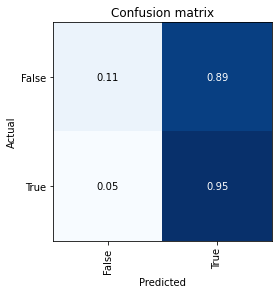

In [24]:
interp.plot_confusion_matrix(normalize=True)

In [25]:
learn.save('fastai_exp_4')

In [26]:
learn.unfreeze()

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


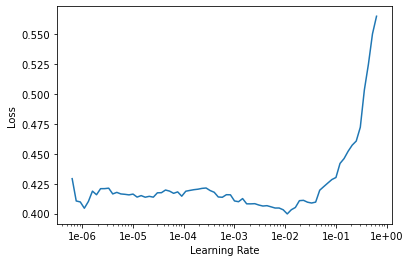

In [30]:
learn.recorder.plot()

In [34]:
doc(learn.fit_one_cycle)

In [37]:
learn.load('fastai_exp_4')
learn.unfreeze()

In [38]:
lr = 1e-2

In [39]:
learn.fit_one_cycle(1,slice(lr))

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,auroc,time
0,0.448464,0.545593,0.749274,0.758317,0.979209,0.070532,0.635867,07:22
